In [1]:
import pandas as pd

%matplotlib inline

In [2]:
ss_life_tables = 'https://www.ssa.gov/oact/STATS/table4c6.html'

In [3]:
tables = pd.read_html(ss_life_tables)

In [4]:
len(tables)

1

In [5]:
life_exp_df = tables[0]

In [6]:
life_exp_df

Exact age  \
                                             Exact age   
0                                                    0   
1                                                    1   
2                                                    2   
3                                                    3   
4                                                    4   
..                                                 ...   
116                                                116   
117                                                117   
118                                                118   
119                                                119   
120  a Probability of dying within one year.  b Num...   

                                                  Male  \
                                  Death  probability a   
0                                             0.005860   
1                                             0.000420   
2                                             0.000272   
3                                             0.000225   
4                                             0.000184   
..                                                 ...   
116                                           0.783097   
117                                           0.822251   
118                                           0.863364   
119                                           0.906532   
120  a Probability of dying within one year.  b Num...   

                                                        \
                                    Number of  lives b   
0                                               100000   
1                                                99414   
2                                                99372   
3                                                99345   
4                                                99323   
..                                                 ...   
116                                                  0   
117                                                  0   
118                                                  0   
119                                                  0   
120  a Probability of dying within one year.  b Num...   

                                                        \
                                       Life expectancy   
0                                                73.54   
1                                                72.97   
2                                                72.00   
3                                                71.02   
4                                                70.04   
..                                                 ...   
116                                               0.76   
117                                               0.70   
118                                               0.65   
119                                               0.60   
120  a Probability of dying within one year.  b Num...   

                                                Female  \
                                  Death  probability a   
0                                             0.005063   
1                                             0.000393   
2                                             0.000223   
3                                             0.000177   
4                                             0.000144   
..                                                 ...   
116                                           0.783097   
117                                           0.822251   
118                                           0.863364   
119                                           0.906532   
120  a Probability of dying within one year.  b Num...   

                                                        \
                                    Number of  lives b   
0                                               100000   
1                                                99494   
2                                     

In [7]:
life_exp_df.columns

MultiIndex([('Exact age',            'Exact age'),
            (     'Male', 'Death  probability a'),
            (     'Male',   'Number of  lives b'),
            (     'Male',      'Life expectancy'),
            (   'Female', 'Death  probability a'),
            (   'Female',   'Number of  lives b'),
            (   'Female',     'Life  expectancy')],
           )

In [28]:
def extract_life_expectancy(df, gender):
    return (df[gender]
        .reset_index()
        .rename(
            columns={'index': 'age',
                     'Death  probability a':'prob_death',
                     'Number of  lives b':'num_lives',
                     'Life expectancy': 'life_exp',
                     'Life  expectancy': 'life_exp',
                    })
        .head(-1)
        .astype({'age': int,
                 'prob_death': float,
                 'num_lives': int,
                 'life_exp': float,
                 }
               )
        .assign(d_num_lives=lambda x: -x['num_lives'].diff()/1_000)
        .assign(a_num_lives=lambda x: x['d_num_lives'].diff())
        )

In [29]:
males = extract_life_expectancy(life_exp_df, 'Male')
females = extract_life_expectancy(life_exp_df, 'Female')

In [30]:
males.head()

,age,prob_death,num_lives,life_exp,d_num_lives,a_num_lives
0,0,0.005860,100000,73.54,NaN,NaN
1,1,0.000420,99414,72.97,0.586,NaN
2,2,0.000272,99372,72.00,0.042,-0.544
3,3,0.000225,99345,71.02,0.027,-0.015
4,4,0.000184,99323,70.04,0.022,-0.005


In [31]:
females.head()

,age,prob_death,num_lives,life_exp,d_num_lives,a_num_lives
0,0,0.005063,100000,79.30,NaN,NaN
1,1,0.000393,99494,78.70,0.506,NaN
2,2,0.000223,99455,77.74,0.039,-0.467
3,3,0.000177,99432,76.75,0.023,-0.016
4,4,0.000144,99415,75.77,0.017,-0.006


In [32]:
males.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
age            120 non-null int64
prob_death     120 non-null float64
num_lives      120 non-null int64
life_exp       120 non-null float64
d_num_lives    119 non-null float64
a_num_lives    118 non-null float64
dtypes: float64(4), int64(2)
memory usage: 5.8 KB


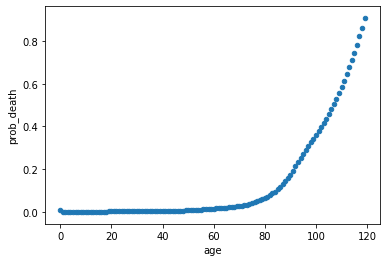

In [13]:
males.plot(kind='scatter',
          x='age',
          y='prob_death')

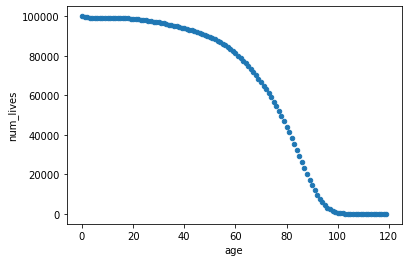

In [14]:
males.plot(kind='scatter',
          x='age',
          y='num_lives')

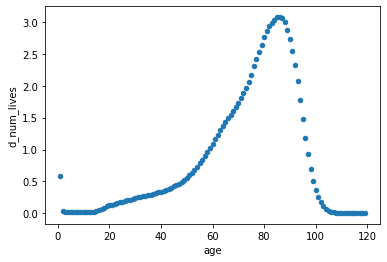

In [15]:
males.plot(kind='scatter',
          x='age',
          y='d_num_lives')

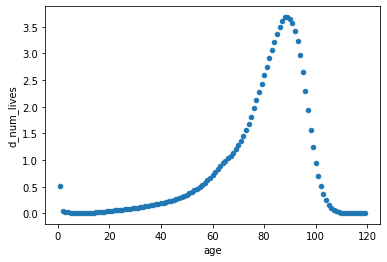

In [16]:
females.plot(kind='scatter',
          x='age',
          y='d_num_lives')

In [33]:
all_df = pd.merge(
            males,
            females,
            how='outer',
            on='age',
            suffixes=('_m','_f')
        )

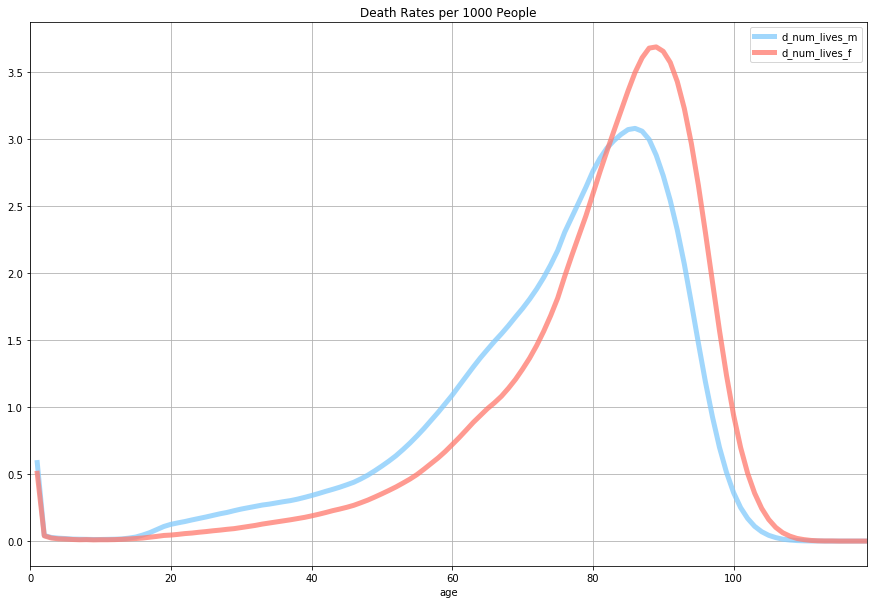

In [34]:
all_df.plot(kind='line',
            x='age',
            y=['d_num_lives_m','d_num_lives_f'],
            color=['xkcd:sky','xkcd:salmon'],
            linewidth=5,
            alpha=0.75,
            title='Death Rates per 1000 People',
            figsize=(15,10),
            grid=True,
        ).figure.savefig("d_num_lives_all.png", facecolor='xkcd:white')

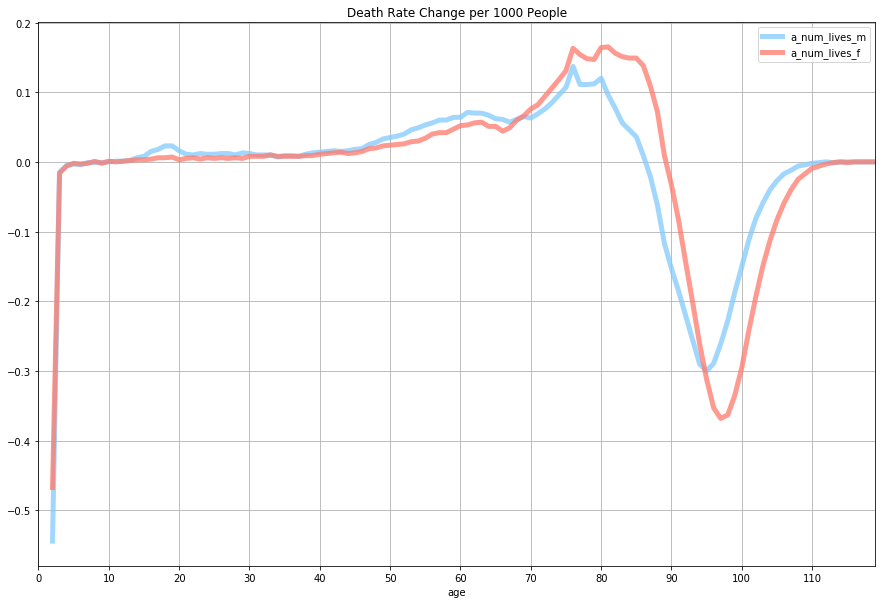

In [40]:
all_df.plot(kind='line',
            x='age',
            y=['a_num_lives_m','a_num_lives_f'],
            color=['xkcd:sky','xkcd:salmon'],
            linewidth=5,
            alpha=0.75,
            title='Death Rate Change per 1000 People',
            figsize=(15,10),
            grid=True,
            xticks = range(0, 120, 10),
        ).figure.savefig("a_num_lives_all.png", facecolor='xkcd:white')